# Week 3 Group Assignment #2

### For this assignment, I will be focusing on doing a race profile for metro-Detroit, which will be useful when looking at transportation equity analysis in metro-Detroit. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataMichigan = pd.read_csv('data/RaceInMichigan.csv', dtype = {'FIPS': str})

In [4]:
dataMichigan.shape             # This shows the dimension of the dataframe, 3017 entries and 322 columns

(3017, 322)

In [5]:
dataMichigan.sample(3)            # This just gives a sample of the first 5 rows just to see the format of the table without taking too much room

FIPS                                         NAME  DP1_0001C  \
533   26053950500  Census Tract 9505; Gogebic County; Michigan       2272   
1220  26099230700   Census Tract 2307; Macomb County; Michigan       5259   
1405  26103000600   Census Tract 6; Marquette County; Michigan       2492   

      DP1_0002C  DP1_0003C  DP1_0004C  DP1_0005C  DP1_0006C  DP1_0007C  \
533          99        107        113         82        100        127   
1220        241        269        296        324        348        320   
1405        100         93         81        136        841        356   

      DP1_0008C  ...  DP1_0151P  DP1_0152P  DP1_0153P  DP1_0154P  DP1_0155P  \
533         141  ...        0.4        1.1        2.4        8.1        5.2   
1220        297  ...          0        0.3        0.1          0        0.8   
1405        192  ...        1.5          0        0.3        1.1        1.3   

      DP1_0156P  DP1_0157P  DP1_0158P  DP1_0159P  DP1_0160P  
533         (X)        (X)        100       71.6       28.4  
1220        (X)        (X)        100       94.4        5.6  
1405        (X)        (X)        100       31.1       68.9  

[3 rows x 322 columns]

In [6]:
dataMichigan.info()                                                # We now know the data type of each column of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Columns: 322 entries, FIPS to DP1_0160P
dtypes: float64(2), int64(155), object(165)
memory usage: 7.4+ MB


In [7]:
dataMichigan.columns[dataMichigan.isna().all()].tolist()           # We are checking to see if there are any columns with all blank values

[]

Looks like there is no empty columns, as seen in the statement printed statement above, so no need to drop any of them

## Setting Up & Filtering Data

Since we only care about race, and not the other columns that are shown in here like gender, age, marital status, etc. we will only keep columns that include relevent information about race. Here is what each column we are keeping means:
- FIPS = Geographic area
- DP1_0076C = Total population 
- DP1_0086C = White population (both alone and in combination with other races included)
- DP1_0087C = Black population (both alone and in combination with other races included)
- DP1_0088C = American Indian & Alaska Native population (both alone and in combination with other races included)
- DP1_0089C = Asian population (both alone and in combination with other races included)
- DP1_0090C = Native Hawaiian & Other Pacific Islander population (both alone and in combination with other races included)
- DP1_0096C = Hispanic or Latino (both alone and in combination with other races included)

In [8]:
race_columns = ['FIPS', 'DP1_0076C', 'DP1_0105C', 'DP1_0087C', 'DP1_0088C', 'DP1_0089C', 'DP1_0090C', 'DP1_0096C']                     # Making a array of all the columns from dataMichigan that I want to keep

raceMichigan = dataMichigan[race_columns]                   # Making a new dataframe that will only include the relevent race
raceMichigan.sample(3)

FIPS  DP1_0076C  DP1_0105C  DP1_0087C  DP1_0088C  DP1_0089C  \
1139  26095990000          0          0          0          0          0   
1837  26125170100       2806       2475         94         44         77   
1636  26125128700       2120       1792         65         29         88   

      DP1_0090C  DP1_0096C  
1139          0          0  
1837          0         88  
1636          2        115

Ideally, you would want the sum of all the populations of each race to add up to the total population in the census track. However, if you look through the rows, you will see that the sum of all these populations exceed the total population. The reason for this is that those of multiple races will count in multiple race categories, hence double/triple counting them when adding them up. So, don't worry about the sums not adding up to the total population, that detail will not affect any of the results of this analysis.

In [9]:
# Renaming the column headers to names that make sense to a reader
raceMichigan.columns = ['FIPS', 'Total Population', 'White', 'Black', 'Native American', 'Asian', 'Pacific Islander', 'Hispanic or Latino']
raceMichigan.sample(3)

FIPS  Total Population  White  Black  Native American  Asian  \
25    26005030902              2574   2041     41               56     11   
1429  26105950300              3693   3428     27               79     27   
2597  26163540500              3466     40   3373               62     13   

      Pacific Islander  Hispanic or Latino  
25                   3                 402  
1429                 8                 101  
2597                 0                  30

We now want to narrow it down into just metro-Detroit, not the whole state of Michigan. For our analysis, we will only look at the 3 main counties that comprise of metro-Detroit, which is Wayne County, Oakland County, and Macomb County. The FIPS county code for Wayne County is 163, Oakland County is 125, and for Macomb County is 099. Since the FIPS state code is 26, the format is state then county code, we only want to include FIPS codes that start with 26163, 26125, and 26099 

In [10]:
counties = raceMichigan['FIPS'].str[2:5].to_numpy()                        # Make a new array of all the county codes for each row
raceMichigan.insert(loc=1, column='County', value=counties)                # Add the county codes to the dataframe into the column right next to FIPS column
raceMichigan.head(3)

FIPS County  Total Population  White  Black  Native American  Asian  \
0  26001000100    001              1690   1630     11               25      5   
1  26001970100    001              2340   2168     23               45     15   
2  26001970400    001              2833   2688     32               71     13   

   Pacific Islander  Hispanic or Latino  
0                 0                  14  
1                 4                  46  
2                 2                  18

In [11]:
# Only including rows where the county codes are 163 (Wayne County), 125 (Oakland County), and 099 (Macomb County)
raceMetroDetroit = raceMichigan[raceMichigan['County'].isin(['163','125','099'])]

# Renaming the county codes into the names of the actual county itself to increase readability
raceMetroDetroit.loc[:,'County'] = raceMetroDetroit['County'].replace({'163': 'Wayne', '125': 'Oakland', '099': 'Macomb'})

# Resetting the row indexing to start from 0
raceMetroDetroit.reset_index(drop=True, inplace=True)
raceMetroDetroit.sample(7)

FIPS   County  Total Population  White  Black  Native American  \
441  26125161400  Oakland              3923   1844   1929               24   
213  26099262200   Macomb              4439   3162    329               84   
811  26163540700    Wayne              3193     74   3068               30   
625  26163504200    Wayne              1644     39   1577               27   
53   26099225701   Macomb              5424   3686    852               95   
249  26125121700  Oakland              5194   4666     52              112   
735  26163530900    Wayne              1698     36   1617               19   

     Asian  Pacific Islander  Hispanic or Latino  
441     34                 0                  27  
213    757                 2                 100  
811     19                 2                  30  
625      6                 1                  14  
53     490                 4                 280  
249     90                 3                 200  
735     13                 1                  22

Now we have all the data needed in order to conduct an analysis on racial profile in metro-Detroit

## Racial Profile

Let's start off by doing a racial profile by county and see the racial distributions within each county. We will also make a stacked bar chart to better visualize the racial profile

In [12]:
raceMetroDetroit['Total Population'].describe()            # This shows statistical information about total populaiton within a census track within metro-Detroit

count    1221.000000
mean     3234.375921
std      1571.221283
min         0.000000
25%      2220.000000
50%      3110.000000
75%      4160.000000
max      9049.000000
Name: Total Population, dtype: float64

In [13]:
# Add up the total populations of each census tract of each race within Wayne County
WayneWhite = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Wayne', 'White'].sum()                          # Sums the White population of all the census tracts within Wayne County 
WayneBlack = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Wayne', 'Black'].sum()                          # Sums the Black population of all the census tracts within Wayne County
WayneAsian = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Wayne', 'Asian'].sum()                          # Sums the Asian population of all the census tracts within Wayne County
WayneHispanic = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Wayne', 'Hispanic or Latino'].sum()          # Sums the Hispanic or Latino population of all the census tracts within Wayne County
WayneNatAmeri = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Wayne', 'Native American'].sum()             # Sums the Native American population of all the census tracts within Wayne County
WaynePacifIsl = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Wayne', 'Pacific Islander'].sum()            # Sums the Pacific Islander population of all the census tracts within Wayne County

# Add up the total populations of each census tract of each race within Oakland County
OaklandWhite = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Oakland', 'White'].sum()                      # Sums the White population of all the census tracts within Oakland County 
OaklandBlack = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Oakland', 'Black'].sum()                      # Sums the Black population of all the census tracts within Oakland County
OaklandAsian = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Oakland', 'Asian'].sum()                      # Sums the Asian population of all the census tracts within Oakland County
OaklandHispanic = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Oakland', 'Hispanic or Latino'].sum()      # Sums the Hispanic or Latino population of all the census tracts within Oakland County
OaklandNatAmeri = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Oakland', 'Native American'].sum()         # Sums the Native American population of all the census tracts within Wayne County
OaklandPacifIsl = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Oakland', 'Pacific Islander'].sum()        # Sums the Pacific Islander population of all the census tracts within Oakland County

# Add up the total populations of each census tract of each race within Macomb County
MacombWhite = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Macomb', 'White'].sum()                        # Sums the White population of all the census tracts within Macomb County 
MacombBlack = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Macomb', 'Black'].sum()                        # Sums the Black population of all the census tracts within Macomb County
MacombAsian = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Macomb', 'Asian'].sum()                        # Sums the Asian population of all the census tracts within Macomb County
MacombHispanic = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Macomb', 'Hispanic or Latino'].sum()        # Sums the Hispanic or Latino population of all the census tracts within Macomb County
MacombNatAmeri = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Macomb', 'Native American'].sum()           # Sums the Native American population of all the census tracts within Wayne County
MacombPacifIsl = raceMetroDetroit.loc[raceMetroDetroit['County'] == 'Macomb', 'Pacific Islander'].sum()          # Sums the Pacific Islander population of all the census tracts within Macomb County

Now we can plot this data into a stacked bar chart with each of the 3 bars being each county, and having each section within a bar being their race

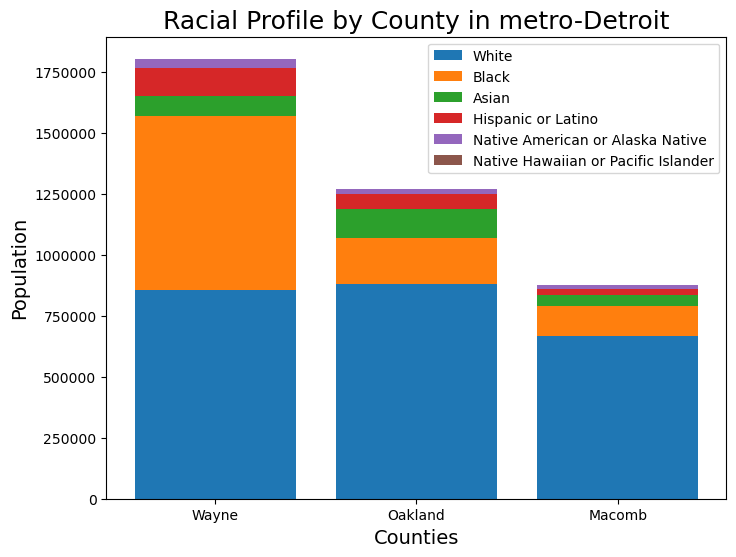

In [14]:
# These will be the categories of the stacked bar chart
counties = ['Wayne', 'Oakland', 'Macomb']                        

# Making arrays for each race. This will help us when creating the stacked bar chart
white = np.array([WayneWhite, OaklandWhite, MacombWhite])
black = np.array([WayneBlack, OaklandBlack, MacombBlack])
asian = np.array([WayneAsian, OaklandAsian, MacombAsian])
hispanic = np.array([WayneHispanic, OaklandHispanic, MacombHispanic])
natameri = np.array([WayneNatAmeri, OaklandNatAmeri, MacombNatAmeri])
pacifisl = np.array([WaynePacifIsl, OaklandPacifIsl, MacombPacifIsl])

# Creating the stacked bar chart
plt.figure(figsize = (8,6))
plt.bar(counties, white, label='White')
plt.bar(counties, black, bottom=white, label='Black')                                                                   # Reason for indicating bottom is so that the new bar can be stacked on the previous bar
plt.bar(counties, asian, bottom=white+black, label = 'Asian')                                                           # Reason for adding is so that it the new bar can be stacked on both the 2 previous bars
plt.bar(counties, hispanic, bottom=white+black+asian, label = 'Hispanic or Latino')
plt.bar(counties, natameri, bottom=white+black+asian+hispanic, label = 'Native American or Alaska Native')
plt.bar(counties, pacifisl, bottom=white+black+asian+hispanic+natameri, label = 'Native Hawaiian or Pacific Islander')
plt.xlabel('Counties', size=14)
plt.ylabel('Population', size=14)
plt.legend(['White', 'Black', 'Asian', 'Hispanic or Latino', 'Native American or Alaska Native', 'Native Hawaiian or Pacific Islander'])
plt.title('Racial Profile by County in metro-Detroit', size=18)

# Removing scienfic notation on my y-axis
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')


As you see, the majority of the Black population is in Wayne County, almost equallying that of the White population. Wayne County is also where the city of Detroit is as well. The Black population in Oakland and Macomb counties are much smaller than that of Wayne County. There also seems to be a greater Hispanic over Asian population in Wayne County too as opposed to Oakland and Macomb Counties. The Native American/Alaska Native and Native Hawaiian/Pacific Islander populations are very small in all 3 counties, as expected. For the midterm project on transportation equity in metro-Detroit, this graph can give us a general idea of where the different racial populations are on a county level.

Next, let's dive deeper into trying to find correlations between the races on an individual cencus tract level.

<Axes: xlabel='Hispanic or Latino', ylabel='White'>

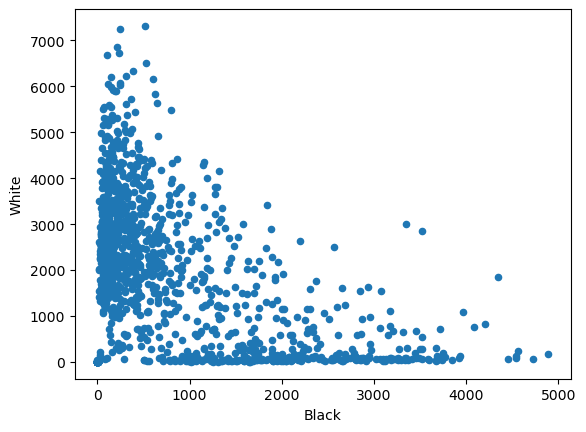

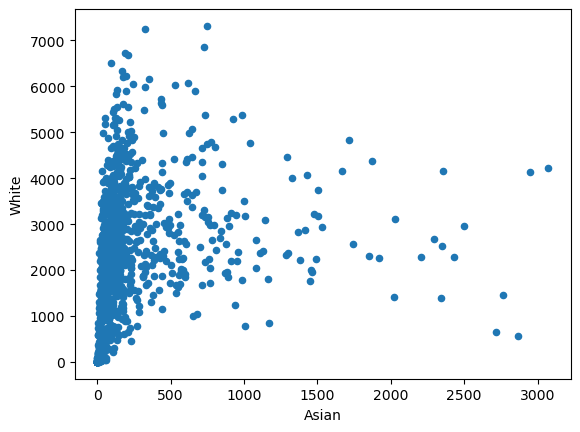

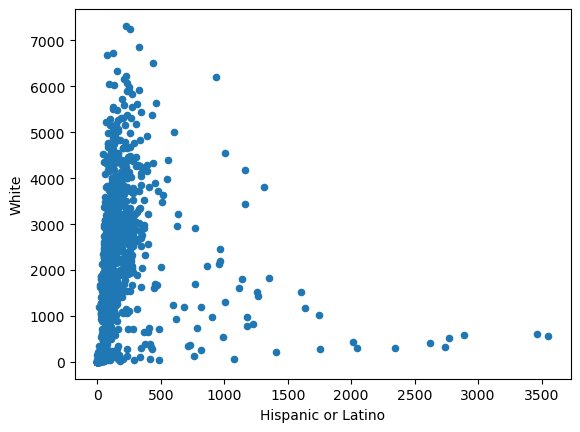

In [15]:
# Let's try to see if we can find a correlation between races in various census tracts
raceMetroDetroit.plot.scatter(x='Black', y='White')
raceMetroDetroit.plot.scatter(x='Asian', y='White')
raceMetroDetroit.plot.scatter(x='Hispanic or Latino', y='White')

Each point within these graphs represent a cencus tract. Looking at these two graphs you can see that there is more segregation between White & Black communities as opposed to White & Asian communities. As seen in the first graph (comparing white and black communities), you can see that most of the census tracts with larger black populations have a very low white population and vice versa. In the second graph, you can see many of the more populus Asian communities also have larger white populations. Now we represented it graphically, how do we represent it numerically?

## Quantifying Racial Segregation using Index of Dissimilarity

We can look at Index of Dissimilarity (D), which is the most common measure of segregation. The larger the number, the more segregation there is. To find this Index of Dissimilarity, we use this formula.
$$ D = \dfrac{1}{2}\Sigma^{n}_{i=1} |\dfrac{a_i}{A_T} - \dfrac{b_i}{B_T}| $$
where $n$ is number of census tracts, $a_i$ is population of race a in tract i, $A_T$ is total population of race a, $b_i$ is population of race b in tract i, $B_T$ is total population of race b 
We can also make a map of each single dissimilarity index for each census tract for each race combination

Let's compare segregation of White population vs Black population, White population vs Asian population, and White population vs Hispanic population. From visual inspection of the table, I decided to not include Native American or Pacific Islander comparisons because those populations are too small to make an accurate judgement of the measure of segregation.

In [16]:
# First find total populations of White, Black, Asian, and Hispanic/Latino. We sum the values from each of the rows within their respective column 
totalWhite = raceMetroDetroit['White'].sum()
totalBlack = raceMetroDetroit['Black'].sum()
totalAsian = raceMetroDetroit['Asian'].sum()
totalHispanic = raceMetroDetroit['Hispanic or Latino'].sum()


# White vs Black

proportionWhiteBlack = []                                                        # Start with an empty array to which each iteration of the formula will add onto this array

for i in range(len(raceMetroDetroit)):                                           # Creating a for-loop that iterates through each of the rows and adds onto the above array. i is the index of the particular tract 
    a = raceMetroDetroit.loc[i,'White']                                          # In dissimilarity formula, a is the population of one race within the certain cencus tract, which in this case is tract i, as it iterates through all of them
    b = raceMetroDetroit.loc[i,'Black']                                          # In dissimilarity formula, b is the population of the other race within the certain cencus tract, which in this case is tract i, as it iterates through all of them
    value = abs((a/totalWhite) - (b/totalBlack))                                 # This is the |(a_i/A_T) - (b_i/B_T)| part of the formula and it yields the value for the particular cencus tract
    proportionWhiteBlack.append(value)                                           # That value now gets appended to the array, which will keep adding on as it iterates thorugh each census tract

indexDissimilarityWhiteBlack = 100 * 0.5 * sum(proportionWhiteBlack)             # All the values of the array need to be summed as the formula requires a summation and the 100x is to convert to percentage 
indexDissimilarityWhiteBlack = round(indexDissimilarityWhiteBlack, 2)            # Round it to the hundreths place (2 decimal places)


                                     
# White vs Asian

proportionWhiteAsian = []                                                        # Start with an empty array to which each iteration of the formula will add onto this array

for i in range(len(raceMetroDetroit)):                                           # Creating a for-loop that iterates through each of the rows and adds onto the above array. i is the index of the particular tract 
    a = raceMetroDetroit.loc[i,'White']                                          # In dissimilarity formula, a is the population of one race within the certain cencus tract, which in this case is tract i, as it iterates through all of them
    b = raceMetroDetroit.loc[i,'Asian']                                          # In dissimilarity formula, b is the population of the other race within the certain cencus tract, which in this case is tract i, as it iterates through all of them
    value = abs((a/totalWhite) - (b/totalAsian))                                 # This is the |(a_i/A_T) - (b_i/B_T)| part of the formula and it yields the value for the particular cencus tract
    proportionWhiteAsian.append(value)                                           # That value now gets appended to the array, which will keep adding on as it iterates thorugh each census tract

indexDissimilarityWhiteAsian = 100 * 0.5 * sum(proportionWhiteAsian)             # All the values of the array need to be summed as the formula requires a summation and the 100x is to convert to percentage 
indexDissimilarityWhiteAsian = round(indexDissimilarityWhiteAsian, 2)            # Round it to the hundreths place (2 decimal places)



# White vs Hispanic

proportionWhiteHispanic = []                                                     # Start with an empty array to which each iteration of the formula will add onto this array

for i in range(len(raceMetroDetroit)):                                           # Creating a for-loop that iterates through each of the rows and adds onto the above array. i is the index of the particular tract 
    a = raceMetroDetroit.loc[i,'White']                                          # In dissimilarity formula, a is the population of one race within the certain cencus tract, which in this case is tract i, as it iterates through all of them
    b = raceMetroDetroit.loc[i,'Hispanic or Latino']                             # In dissimilarity formula, b is the population of the other race within the certain cencus tract, which in this case is tract i, as it iterates through all of them
    value = abs((a/totalWhite) - (b/totalHispanic))                              # This is the |(a_i/A_T) - (b_i/B_T)| part of the formula and it yields the value for the particular cencus tract
    proportionWhiteHispanic.append(value)                                        # That value now gets appended to the array, which will keep adding on as it iterates thorugh each census tract

indexDissimilarityWhiteHispanic = 100 * 0.5 * sum(proportionWhiteHispanic)       # All the values of the array need to be summed as the formula requires a summation and the 100x is to convert to percentage 
indexDissimilarityWhiteHispanic = round(indexDissimilarityWhiteHispanic, 2)      # Round it to the hundreths place (2 decimal places)


print('The Index of Dissimilarity of White vs Black population is: ' + str(indexDissimilarityWhiteBlack) + '%')
print('The Index of Dissimilarity of White vs Asian population is: ' + str(indexDissimilarityWhiteAsian) + '%')
print('The Index of Dissimilarity of White vs Hispanic population is: ' + str(indexDissimilarityWhiteHispanic) + '%')


The Index of Dissimilarity of White vs Black population is: 68.02%
The Index of Dissimilarity of White vs Asian population is: 45.35%
The Index of Dissimilarity of White vs Hispanic population is: 40.52%


What does the Index of Dissimilarity mean. Since we got 68.02% for White vs Black population, this would mean that 68.02% of Blacks would need to move in order to achieve a uniform distribution by race. That is a lot of people that would have to move, that just shows how un-uniform and segregated current metro-Detroit is right now.

Text(0.5, 0.98, 'Index of Dissimilarity by Each Minority Group compared to White in metro-Detroit')

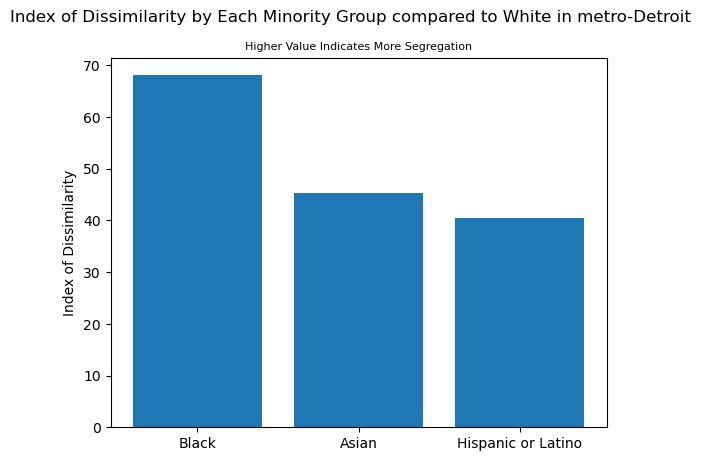

In [17]:
races = ['Black', 'Asian', 'Hispanic or Latino']                                                                     # Create a cateogrical list which will serve as the x-axis in our bar chart
dissimilarity = [indexDissimilarityWhiteBlack, indexDissimilarityWhiteAsian, indexDissimilarityWhiteHispanic]        # Create a list of all the Index of Dissimilarities so that the positions of each index line up with the race in the above list

# Plotting bat chart
plt.bar(races, dissimilarity)
plt.ylabel('Index of Dissimilarity')
plt.title('Higher Value Indicates More Segregation', fontsize = 8)
plt.suptitle('Index of Dissimilarity by Each Minority Group compared to White in metro-Detroit')

## Setting up and Filtering GeoData

In [18]:
import geopandas as gpd                                            # In order to map geographical coordinates, we need to import the geopandas library

In [19]:
michiganTracts = gpd.read_file('data/tl_2020_26_tract.zip')        # Reading in the geojson file of Michigan with the geometries of the cencus track boundaries
michiganTracts.sample(5)                  

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


STATEFP COUNTYFP TRACTCE        GEOID  NAME           NAMELSAD  MTFCC  \
1661      26      163  522000  26163522000  5220  Census Tract 5220  G5020   
2562      26      073  000600  26073000600     6     Census Tract 6  G5020   
2872      26      099  231900  26099231900  2319  Census Tract 2319  G5020   
433       26      111  291000  26111291000  2910  Census Tract 2910  G5020   
827       26      163  572500  26163572500  5725  Census Tract 5725  G5020   

     FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
1661        S  1605640       0  +42.3435761  -083.0875927   
2562        S  2365680    2476  +43.5891370  -084.7554321   
2872        S  2908557       0  +42.5594274  -082.9990423   
433         S  5704260    5942  +43.6481305  -084.2688725   
827         S  1292088     871  +42.2715015  -083.3018809   

                                               geometry  
1661  POLYGON ((-83.09899 42.35014, -83.09851 42.350...  
2562  POLYGON ((-84.76750 43.58654, -84.76750 43.588...  
2872  POLYGON ((-83.01020 42.56630, -83.00869 42.566...  
433   POLYGON ((-84.29012 43.64291, -84.29013 43.645...  
827   POLYGON ((-83.30931 42.27550, -83.30911 42.275...

Now we need to filter out the rows so that it only includes the metro-Detroit region which comprise of Wayne County (163), Oakland County (125), and Macomb County (099)

In [20]:
metroDetroitTracts = michiganTracts[michiganTracts['COUNTYFP'].isin(['163','125','099'])]    # Keeping only rows with CountyFP = 163, 125, and 099
metroDetroitTracts.sample(5)

STATEFP COUNTYFP TRACTCE        GEOID     NAME              NAMELSAD  \
1635      26      163  550900  26163550900     5509     Census Tract 5509   
1176      26      163  560201  26163560201  5602.01  Census Tract 5602.01   
1984      26      125  157000  26125157000     1570     Census Tract 1570   
2826      26      099  255800  26099255800     2558     Census Tract 2558   
662       26      163  540600  26163540600     5406     Census Tract 5406   

      MTFCC FUNCSTAT    ALAND   AWATER     INTPTLAT      INTPTLON  \
1635  G5020        S  2492682  1655800  +42.4342045  -082.8771963   
1176  G5020        S   924214   183479  +42.4337328  -083.4668345   
1984  G5020        S  4485814        0  +42.5416022  -083.3315311   
2826  G5020        S  1284138        0  +42.4983898  -082.9271768   
662   G5020        S  1197254        0  +42.4224753  -083.2339950   

                                               geometry  
1635  POLYGON ((-82.88940 42.41998, -82.88884 42.421...  
1176  POLYGON ((-83.47445 42.43589, -83.47434 42.435...  
1984  POLYGON ((-83.34168 42.55672, -83.33987 42.556...  
2826  POLYGON ((-82.93870 42.49444, -82.93850 42.494...  
662   POLYGON ((-83.23887 42.42957, -83.23776 42.429...

We are going to merge this tract data with the raceMetroDetroit dataframe so that all the data is in one dataframe. To be able to do the merge, we are going to select the column in which we will be able to do the merge, which in this case will be the FIPS code. To be able to do a merge, the column we are merging on has to contain the same name in both dataframes. In raceMetroDetroit dataframe it is called "FIPS" and in metroDetroitTracts it is called "GEOID". So I must change that.


In [21]:
# Change the column header in metroDetroitTracts dataframe from "GEOID" to "FIPS"
metroDetroitTracts.rename(columns = {'GEOID':'FIPS'}, inplace = True)

# Now merge this dataframe to the raceMetroDetroit dataframe
metroDetroitTracts_race = metroDetroitTracts.merge(raceMetroDetroit, on='FIPS')

# Removing the columns we don't need
metroDetroitTracts_race.drop(columns = ['STATEFP', 'COUNTYFP', 'NAME', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON'], inplace = True)

metroDetroitTracts_race.sample(5)

/tmp/ipykernel_130/2293766603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metroDetroitTracts.rename(columns = {'GEOID':'FIPS'}, inplace = True)


TRACTCE         FIPS                                           geometry  \
954  247201  26099247201  POLYGON ((-82.85097 42.58376, -82.85093 42.584...   
538  986300  26163986300  POLYGON ((-83.38893 42.19419, -83.38848 42.194...   
279  506700  26163506700  POLYGON ((-83.05406 42.44751, -83.05389 42.447...   
849  132500  26125132500  POLYGON ((-83.60156 42.59163, -83.60116 42.591...   
805  124000  26125124000  POLYGON ((-83.68940 42.87086, -83.68938 42.871...   

      County  Total Population  White  Black  Native American  Asian  \
954   Macomb              4104   3345    466               74     90   
538    Wayne                29     11      8                5      2   
279    Wayne              1023     27    986               10      4   
849  Oakland              3531   3202     56              109     34   
805  Oakland              6045   5308    213              174    125   

     Pacific Islander  Hispanic or Latino  
954                 6                  98  
538                 1                   8  
279                 0                  10  
849                 2                  73  
805                 8                 200

Now we have all the data in place to be able to make maps. Let's plot it and find the distribution of each race within metro-Detroit

## Mapping the GeoData

Although we now have all the data we need, before we map it it is better to look 

In [22]:
# Doing it by percentages is a better way of representing this to account for total population differences between populations
metroDetroitTracts_race['PCT_Black'] = metroDetroitTracts_race['Black']/metroDetroitTracts_race['Total Population']*100
metroDetroitTracts_race['PCT_White'] = metroDetroitTracts_race['White']/metroDetroitTracts_race['Total Population']*100
metroDetroitTracts_race['PCT_Asian'] = metroDetroitTracts_race['Asian']/metroDetroitTracts_race['Total Population']*100
metroDetroitTracts_race['PCT_Hispanic'] = metroDetroitTracts_race['Hispanic or Latino']/metroDetroitTracts_race['Total Population']*100

Text(0.5, 1.0, 'Distribution of White Community')

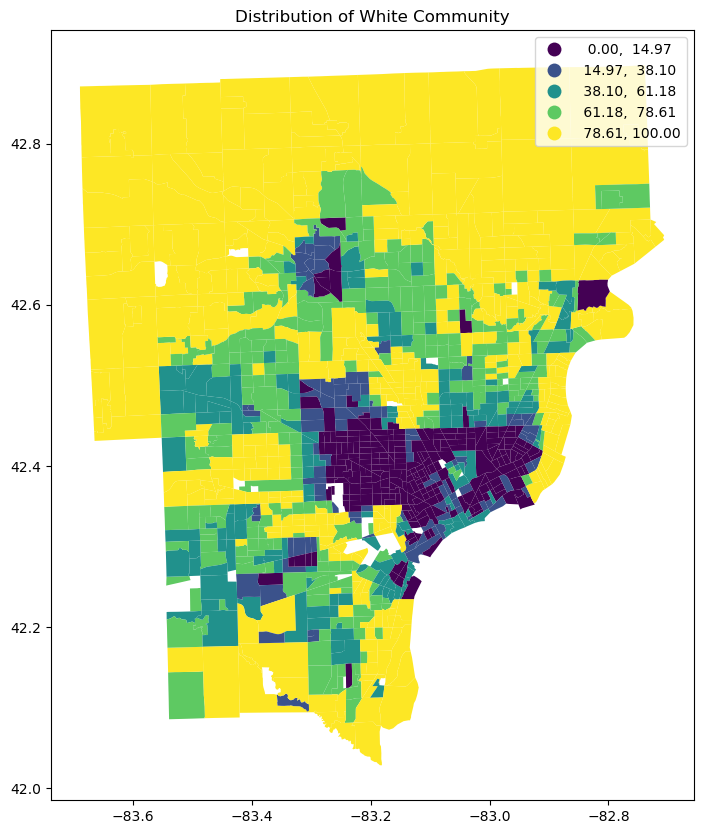

In [23]:
# Plotting the population distribution for the White community
metroDetroitTracts_race.plot(figsize =(12,10), column='PCT_White', legend=True, scheme='NaturalBreaks')
plt.title('Distribution of White Community')

Text(0.5, 1.0, 'Distribution of Black Community')

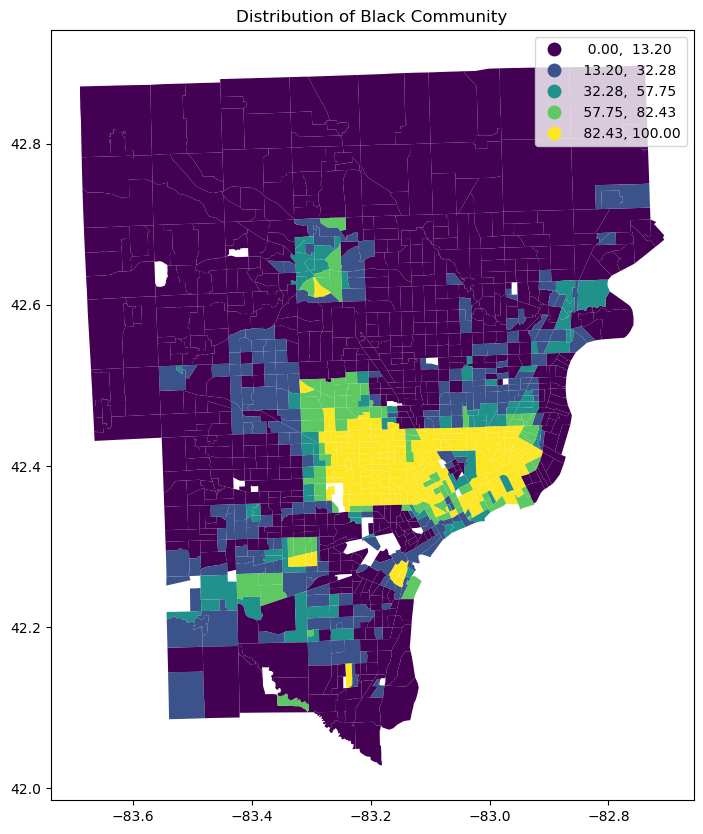

In [24]:
# Plotting the population distribution for the Black community
metroDetroitTracts_race.plot(figsize =(12,10), column='PCT_Black', legend=True, scheme='NaturalBreaks')
plt.title('Distribution of Black Community')

Text(0.5, 1.0, 'Distribution of Asian Community')

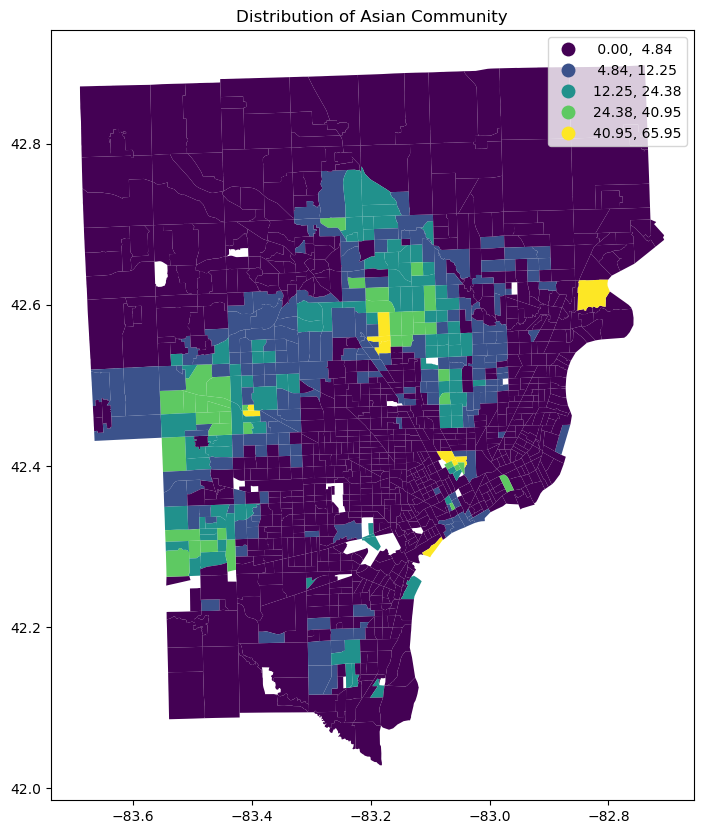

In [25]:
# Plotting the population distribution for the Asian community
metroDetroitTracts_race.plot(figsize =(12,10), column='PCT_Asian', legend=True, scheme='NaturalBreaks')
plt.title('Distribution of Asian Community')

Text(0.5, 1.0, 'Distribution of Hispanic or Latino Community')

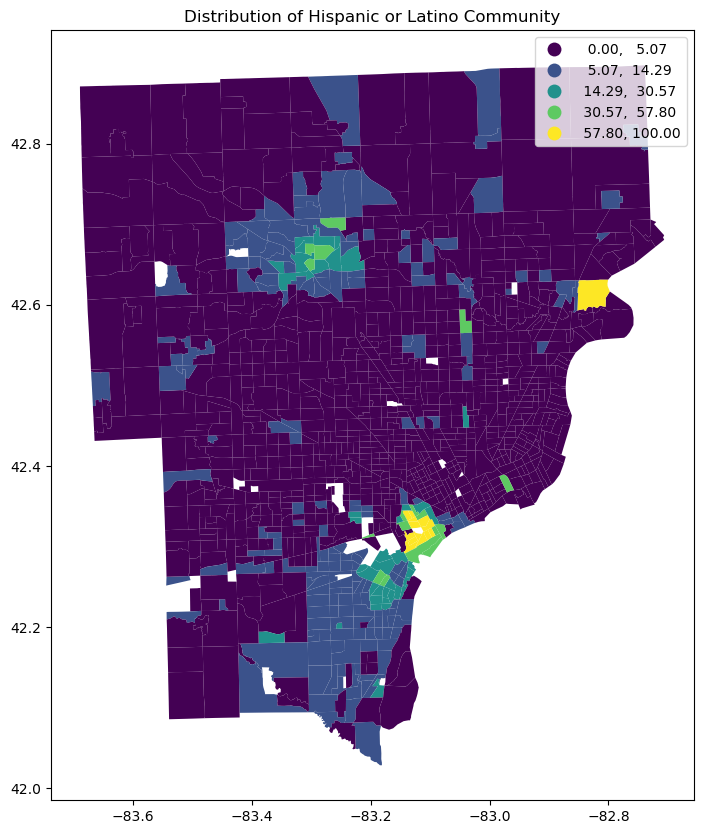

In [26]:
# Plotting the population distribution for the Hispanic or Latino community
metroDetroitTracts_race.plot(figsize =(12,10), column='PCT_Hispanic', legend=True, scheme='NaturalBreaks')
plt.title('Distribution of Hispanic or Latino Community')

We did that Index of Dissimilarity Analysis before, but now we can actually map that data. Rather than creating seperate maps for White community distribution and black community distribution, we can now create a map that indicates the segregation between White and Black communtiies. From the Index of Dissimilarity formula, we can make use of $\dfrac{a_i}{A_T} - \dfrac{b_i}{B_T}$ term in the formula where $a_i$ is population of race a in tract i, $A_T$ is total population of race a, $b_i$ is population of race b in tract i, $B_T$ is total population of race b.

This term is very powerful, because a value of 0 means that there is equal proportion of the races within the census track. For example, say that there is 200 White people in the whole city and 100 Black people in the whole city. Looking within one census tract within the city, if there is 20 White people in the census tract, for there to be no segregation, there should be 10 Black people within that same census tract, as both 10% of White people and 10% of Black people of the city would be living within the census tract. Plugging these numbers into the formula term $\dfrac{a_i}{A_T} - \dfrac{b_i}{B_T}$ will become $\dfrac{20}{200} - \dfrac{10}{100} $ which is $0$.

If the term yields a positive number, it would indicate that there are proportionally more of race A, and if the term yields a negative number, it would indicate that therer are proportionally more of race B.

In [27]:
# Creating an array of dissimilarity values for each census tract

totalWhite = metroDetroitTracts_race['White'].sum()
totalBlack = metroDetroitTracts_race['Black'].sum()
WhiteBlack = []


for i in range(len(metroDetroitTracts_race)):                                           # Creating a for-loop that iterates through each of the rows and adds onto the above array. i is the index of the particular tract 
    a = metroDetroitTracts_race.loc[i,'White']                                          # In dissimilarity formula, a is the population of one race within the certain cencus tract, which in this case is tract i, as it iterates through all of them
    b = metroDetroitTracts_race.loc[i,'Black']                                          # In dissimilarity formula, b is the population of the other race within the certain cencus tract, which in this case is tract i, as it iterates through all of them
    value = (a/totalWhite) - (b/totalBlack)                                             # This is the (a_i/A_T) - (b_i/B_T) part of the formula and it yields the value for the particular cencus tract
    WhiteBlack.append(value)                                                            # That value now gets appended to the array called WhiteBlack, which will keep adding on as it iterates thorugh each census tract

In [34]:
# Adding this array as a new column in the metroDetroitTracts_race dataframe and naming it as metroDetroitTracts_dissimRace
metroDetroitTracts_dissimRace = metroDetroitTracts_race.copy()                          # Making a copy of the existing dataframe
metroDetroitTracts_dissimRace['WhiteBlack Dissimilarity'] = WhiteBlack                  # Adding a new column to the new dataframe and inserting the WhiteBlack array from above into that column

metroDetroitTracts_dissimRace.sample(5)

TRACTCE         FIPS                                           geometry  \
129  583500  26163583500  POLYGON ((-83.25004 42.24887, -83.24992 42.248...   
565  560100  26163560100  POLYGON ((-83.49840 42.43470, -83.49813 42.434...   
141  538700  26163538700  POLYGON ((-83.17070 42.43125, -83.17029 42.431...   
238  579800  26163579800  POLYGON ((-83.15182 42.23475, -83.15178 42.234...   
470  599001  26163599001  POLYGON ((-83.30432 42.11599, -83.29017 42.116...   

    County  Total Population  White  Black  Native American  Asian  \
129  Wayne              2695   2109    218              102     52   
565  Wayne              2793   2561     24               25    105   
141  Wayne              3823     51   3736               43      6   
238  Wayne              1494    710    431               66     20   
470  Wayne              5274   4272    426              174     81   

     Pacific Islander  Hispanic or Latino  PCT_Black  PCT_White  PCT_Asian  \
129                 8                 237   8.089054  78.256030   1.929499   
565                 6                  51   0.859291  91.693520   3.759398   
141                 3                  50  97.724300   1.334031   0.156945   
238                 2                 278  28.848728  47.523427   1.338688   
470                 4                 301   8.077361  81.001138   1.535836   

     PCT_Hispanic  WhiteBlack Dissimilarity  
129      8.794063                  0.000665  
565      1.825994                  0.001043  
141      1.307873                 -0.003624  
238     18.607764                 -0.000125  
470      5.707243                  0.001363

Text(0.5, 1.0, 'Distribution of White and Black Populations in Metro-Detroit')

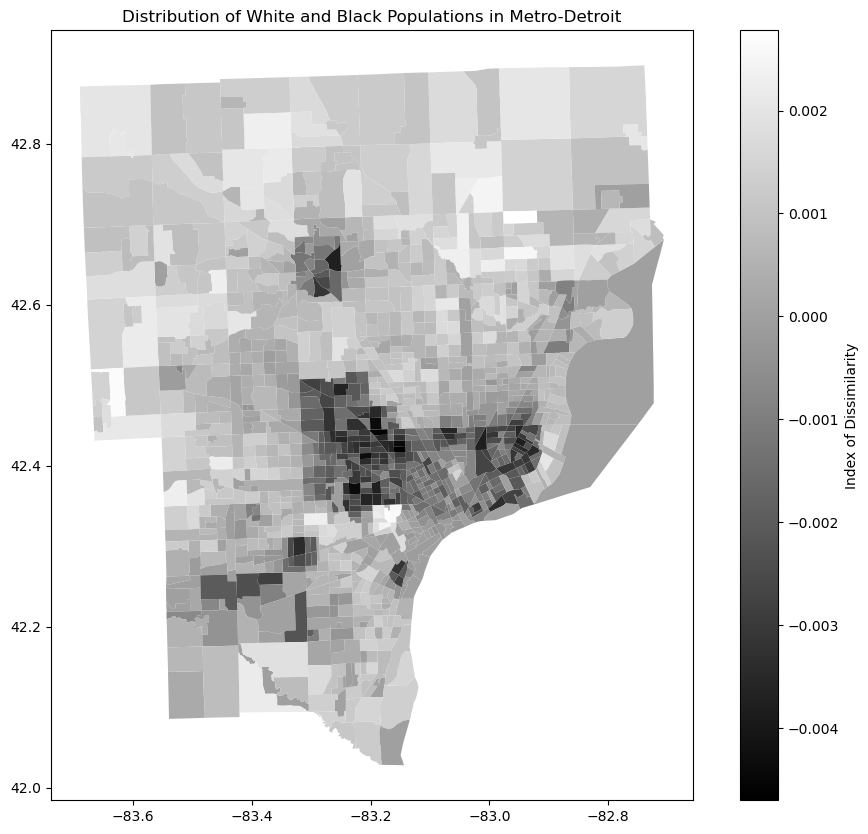

In [30]:
# Plotting the dissimilarity between White and Black community in metro-Detroit
metroDetroitTracts_dissimRace.plot(figsize=(12,10), 
                                   column = 'WhiteBlack Dissimilarity', 
                                   legend = True, cmap = 'gray', 
                                   legend_kwds={"label": "Index of Dissimilarity"})
plt.title('Distribution of White and Black Populations in Metro-Detroit')

Now we can make an interactive version of this map using Folium

In [31]:
import folium

In [33]:
# Creating the basemap
m = folium.Map(location = [42.3317,-83.0471],
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')


# Now adding our data on top of the basemap
folium.Choropleth(geo_data = metroDetroitTracts_dissimRace,            # geo data
                  data = metroDetroitTracts_dissimRace,                # data
                  key_on='feature.properties.FIPS',                    # key, or merge column
                  columns=['FIPS', 'WhiteBlack Dissimilarity'],        # [key, value]
                  fill_color='Greys_r',
                  line_weight=0.1,
                  fill_opacity=0.8,
                  line_opacity=0.2,                                    # line opacity (of the border)
                  legend_name='Index of Dissimilarity between White and Black populations in metro-Detroit',
                  name = "WhiteBlack Dissimilarity").add_to(m)         # name on the legend color bar

folium.LayerControl(position='topright', collapsed=True, autoZIndex=True).add_to(m)

m                   